<a href="https://colab.research.google.com/github/Shivansh1969/LR-w-o-scikit-learn/blob/main/Linear_Regression_w_o_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
dB = pd.read_csv('/content/drive/MyDrive/Height&Weights.csv')

In [19]:
dB.head()

,Id,height,weight
0,1,70.49366,129.3840
1,2,65.23482,104.5786
2,3,67.59619,131.7669
3,4,68.51919,135.0276
4,5,67.07600,118.4065


height will be our target variable and weight our predictor variable

In [22]:
x = dB['height']
y = dB['weight']

In [23]:
y

,weight
0,129.3840
1,104.5786
2,131.7669
3,135.0276
4,118.4065
...,...
19995,126.4284
19996,133.7741
19997,127.7977
19998,124.5901


In [24]:
x

,height
0,70.49366
1,65.23482
2,67.59619
3,68.51919
4,67.07600
...,...
19995,66.69938
19996,70.60422
19997,67.57167
19998,69.83352


Visualizing the data in a scatter plot

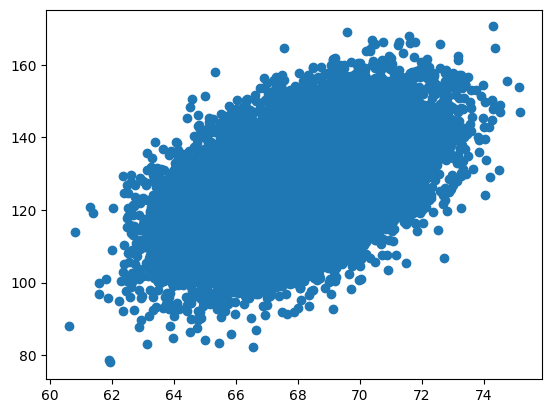

In [39]:
plt.scatter(x,y)

now to get a simple 2D linear Regression equation  **Y = m*x + C**,
m being slop and C being y intercept




# SSxx
sum of squares of the Xs which is basically the difference of mean value of x and each x entry squared and summed.

In [33]:
x_mean = x.mean()
y_mean = y.mean()

In [27]:
dB['xdiff'] = x_mean - x

In [29]:
dB

,Id,height,weight,xdiff
0,1,70.49366,129.3840,-2.498433
1,2,65.23482,104.5786,2.760407
2,3,67.59619,131.7669,0.399037
3,4,68.51919,135.0276,-0.523963
4,5,67.07600,118.4065,0.919227
...,...,...,...,...
19995,19996,66.69938,126.4284,1.295847
19996,19997,70.60422,133.7741,-2.608993
19997,19998,67.57167,127.7977,0.423557
19998,19999,69.83352,124.5901,-1.838293


In [30]:
dB['xdiff_squared'] = dB['xdiff']**2


In [31]:
dB

,Id,height,weight,xdiff,xdiff_squared
0,1,70.49366,129.3840,-2.498433,6.242167
1,2,65.23482,104.5786,2.760407,7.619848
2,3,67.59619,131.7669,0.399037,0.159231
3,4,68.51919,135.0276,-0.523963,0.274537
4,5,67.07600,118.4065,0.919227,0.844979
...,...,...,...,...,...
19995,19996,66.69938,126.4284,1.295847,1.679220
19996,19997,70.60422,133.7741,-2.608993,6.806843
19997,19998,67.57167,127.7977,0.423557,0.179401
19998,19999,69.83352,124.5901,-1.838293,3.379320


In [52]:
SSxx = dB.xdiff_squared.sum()
SSxx

np.float64(72117.69899427317)

Now we'll find SSxy which is the diff b/w mean value of Xs and each X entry multiplied by its corresponding  Y mean and Y value and then summed over.

In [34]:
dB['ydiff'] = y_mean - y

In [35]:
dB

,Id,height,weight,xdiff,xdiff_squared,ydiff
0,1,70.49366,129.3840,-2.498433,6.242167,-2.286686
1,2,65.23482,104.5786,2.760407,7.619848,22.518714
2,3,67.59619,131.7669,0.399037,0.159231,-4.669586
3,4,68.51919,135.0276,-0.523963,0.274537,-7.930286
4,5,67.07600,118.4065,0.919227,0.844979,8.690814
...,...,...,...,...,...,...
19995,19996,66.69938,126.4284,1.295847,1.679220,0.668914
19996,19997,70.60422,133.7741,-2.608993,6.806843,-6.676786
19997,19998,67.57167,127.7977,0.423557,0.179401,-0.700386
19998,19999,69.83352,124.5901,-1.838293,3.379320,2.507214


In [53]:
SSxy = (dB.xdiff*dB.ydiff).sum()
SSxy

np.float64(222509.22687406698)

Slope(m) = SSxy/SSxx

In [38]:
m = SSxy/SSxx
m

np.float64(3.0853622616514196)

Now to find Y intercept C
# C = Ymean - Xmean*m

In [40]:
C = y_mean - x_mean*m
C

np.float64(-82.69259401235509)

plotting the formulated line in the scatter plot for better visualization of our algo

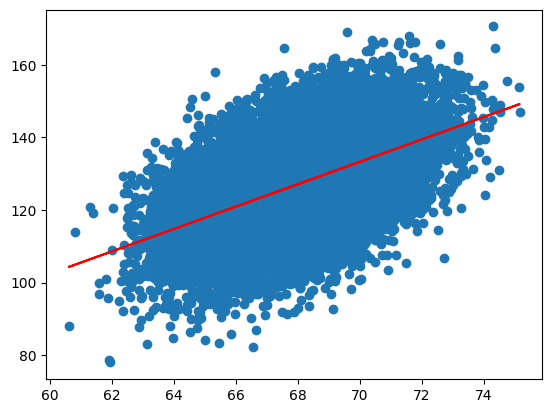

In [45]:
plt.scatter(x,y)
plt.plot(x,m*x+C,'r')

Making a prediction function

In [48]:
def predict(value):
  return m*value + C

In [50]:
predict(70.49366)

np.float64(134.80588423733116)